<a href="https://colab.research.google.com/github/SHARKZTECH/INTRO-TO-ML/blob/main/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

- dataset https://www.kaggle.com/datasets/dipam7/student-grade-prediction
- Car tracker
- Blockchain land
- Sign language   https://github.com/sign/translate
- Products price analyzer
- wbm https://github.com/michaelkitas/WhatsApp-Integration-in-React-Node/tree/master/client

In [ ]:
data=pd.read_csv("student-mat.csv",sep=";")

In [ ]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
print(data.describe)

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [ ]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
data=data[["G1","G2","G3","studytime","failures","absences"]]

In [ ]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [ ]:
predict="G3"
x=np.array(data.drop([predict],1))
y=np.array(data[predict])

<ipython-input-57-08d43d8d292a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(data.drop([predict],1))


In [ ]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,train_size=0.1)

In [ ]:
linear=linear_model.LinearRegression()

linear.fit(x_train,y_train)
acc=linear.score(x_test,y_test)
print(acc)

0.8079992900576967


In [ ]:
print("Co : ",linear.coef_)
print("Intercept :",linear.intercept_)

Co :  [-0.02419521  1.24725536 -0.74619594 -0.21230506  0.0928787 ]
Intercept : -1.6555257681919393


In [ ]:
predications=linear.predict(x_test)
for x in range(len(predications)):
  print(predications[x],x_test[x],y_test[x])

Save model

In [ ]:
import pickle

with open("studentmodel.pickel","wb") as f:
  pickle.dump(linear,f)

In [ ]:
pickle_in=open("studentmodel.pickel","rb")
linear=pickle.load(pickle_in)

In [ ]:
predications=linear.predict(x_test)
for x in range(len(predications)):
  print(predications[x],x_test[x],y_test[x])

Save best model


In [ ]:
import pickle

best=0
for _ in range(50):
  x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,train_size=0.1)
  linear=linear_model.LinearRegression()

  linear.fit(x_train,y_train)
  acc=linear.score(x_test,y_test)
  print(acc)

  if acc>best:
    best=acc
    with open("studentmodel.pickel","wb") as f:
      pickle.dump(linear,f)

In [ ]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


<function matplotlib.pyplot.show(close=None, block=None)>

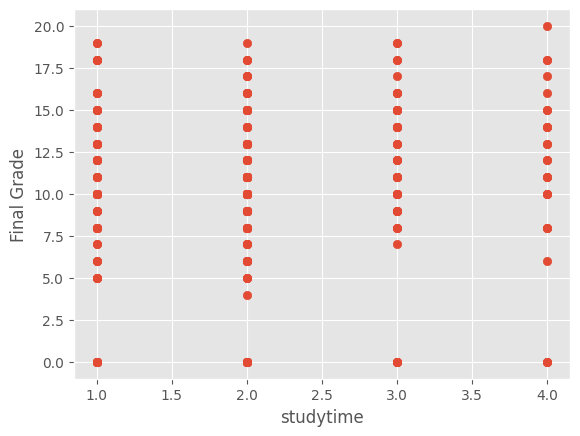

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

p="studytime"
style.use("ggplot")
plt.scatter(data[p],data['G3'])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show